In [57]:
names = [
    'Maxim',
    'Andrej',
    'Anna',
    'Lex',
    'Jeremy',
    'Sergei',
    'Alexander',
    'Maxeo',
    'George',
    'Elon',
    'Faust',
    'Michael',
    'Jennifer',
    'James',
    'Emily',
    'David',
    'Ashley',
    'Christopher',
    'Sarah',
    'Matthew',
    'Jessica',
    'Joshua',
    'Megan',
    'Daniel',
    'Amanda',
    'Ryan',
    'Ethan',
    'Olivia',
    'Lucas',
    'Sophia',
    'Liam',
    'Ava',
    'Noah',
    'Isabella',
    'Mason',
    'Mia',
    'Jacob',
    'Charlotte',
    'William',
    'Abigail',
    'Jack',
    'Madison',
    'Henry',
    'Ella',
    'Samuel',
    'Quentin',
    'Grace',
    'Logan',
    'Victoria',
    'Owen',
    'Chloe',
    'Nathan',
    'Lily',
    'Benjamin',
    'Zoe',
    'Andrew',
    'Nora',
    'Thomas',
    'Hannah',
    'Joseph',
    'Amelia',
    'Robert',
    'Luna',
    'Charles',
    'Scarlett',
    'Jason',
    'Harper',
    'Aaron',
    'Aria',
    'Tyler',
    'Ellie',
    'Brian',
    'Sophie',
    'Kevin',
    'Aurora',
    'Steven',
    'Hazel',
    'Eric',
    'Zoey',
    'Patrick',
    'Stella',
    'Mark',
    'Lucy',
    'Anthony',
    'Peyton',
    'Brandon',
    'Layla',
    'Sean',
    'Savannah',
    'Richard',
    'Skylar',
    'Paul',
    'Ariana',
    'Edward',
    'Brooklyn',
    'Peter',
    'Caroline',
    'Scott',
    'Aubrey',
    'Jason',
    'Penelope'
]

words = [name.lower() for name in names]

In [58]:
b = {}
special_start = '<S>'
special_end = '<E>'
for w in words:
    characters = [special_start] + list(w) + [special_end]
    for ch1, ch2 in zip(characters, characters[1:]):
        bigram = (ch1, ch2)
        # filled in dictionary 
        # key is bigram and value is amount of it in dataset
        b[bigram] = b.get(bigram, 0) + 1

In [70]:
# sort 
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 21),
 (('a', '<E>'), 19),
 (('a', 'n'), 18),
 (('<S>', 'a'), 15),
 (('a', 'r'), 13),
 (('<S>', 's'), 12),
 (('e', 'l'), 11),
 (('<S>', 'j'), 10),
 (('e', 'r'), 10),
 (('i', 'a'), 10),
 (('<S>', 'm'), 9),
 (('y', '<E>'), 9),
 (('e', '<E>'), 9),
 (('o', 'n'), 9),
 (('h', 'a'), 9),
 (('m', 'a'), 8),
 (('<S>', 'l'), 8),
 (('r', 'i'), 8),
 (('r', '<E>'), 7),
 (('<S>', 'e'), 7),
 (('e', 'n'), 7),
 (('a', 'm'), 7),
 (('l', 'i'), 7),
 (('n', 'a'), 6),
 (('l', 'e'), 6),
 (('i', 'c'), 6),
 (('c', 'h'), 6),
 (('l', '<E>'), 6),
 (('j', 'a'), 6),
 (('a', 's'), 6),
 (('s', 'o'), 6),
 (('l', 'a'), 6),
 (('n', 'd'), 5),
 (('l', 'o'), 5),
 (('<S>', 'c'), 5),
 (('r', 'a'), 5),
 (('h', '<E>'), 5),
 (('t', 'h'), 5),
 (('l', 'l'), 5),
 (('r', 'o'), 5),
 (('p', 'e'), 5),
 (('<S>', 'p'), 5),
 (('r', 'e'), 4),
 (('n', 'n'), 4),
 (('o', 'r'), 4),
 (('a', 'u'), 4),
 (('s', 't'), 4),
 (('t', '<E>'), 4),
 (('m', 'i'), 4),
 (('s', '<E>'), 4),
 (('i', 'l'), 4),
 (('v', 'i'), 4),
 (('e', 'y'), 4),
 (

In [60]:
import torch

In [61]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [62]:
chars = sorted(list((set(''.join(words)))))
stoi = {s:i for i, s in enumerate(chars)}
stoi[special_start] = 26
stoi[special_end] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [68]:
for w in words:
    characters = [special_start] + list(w) + [special_end]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        # increment counter in coordinates of related "bigram"
        N[ix1, ix2] += 1

In [74]:
itos = {i:s for s, i in stoi.items()}

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

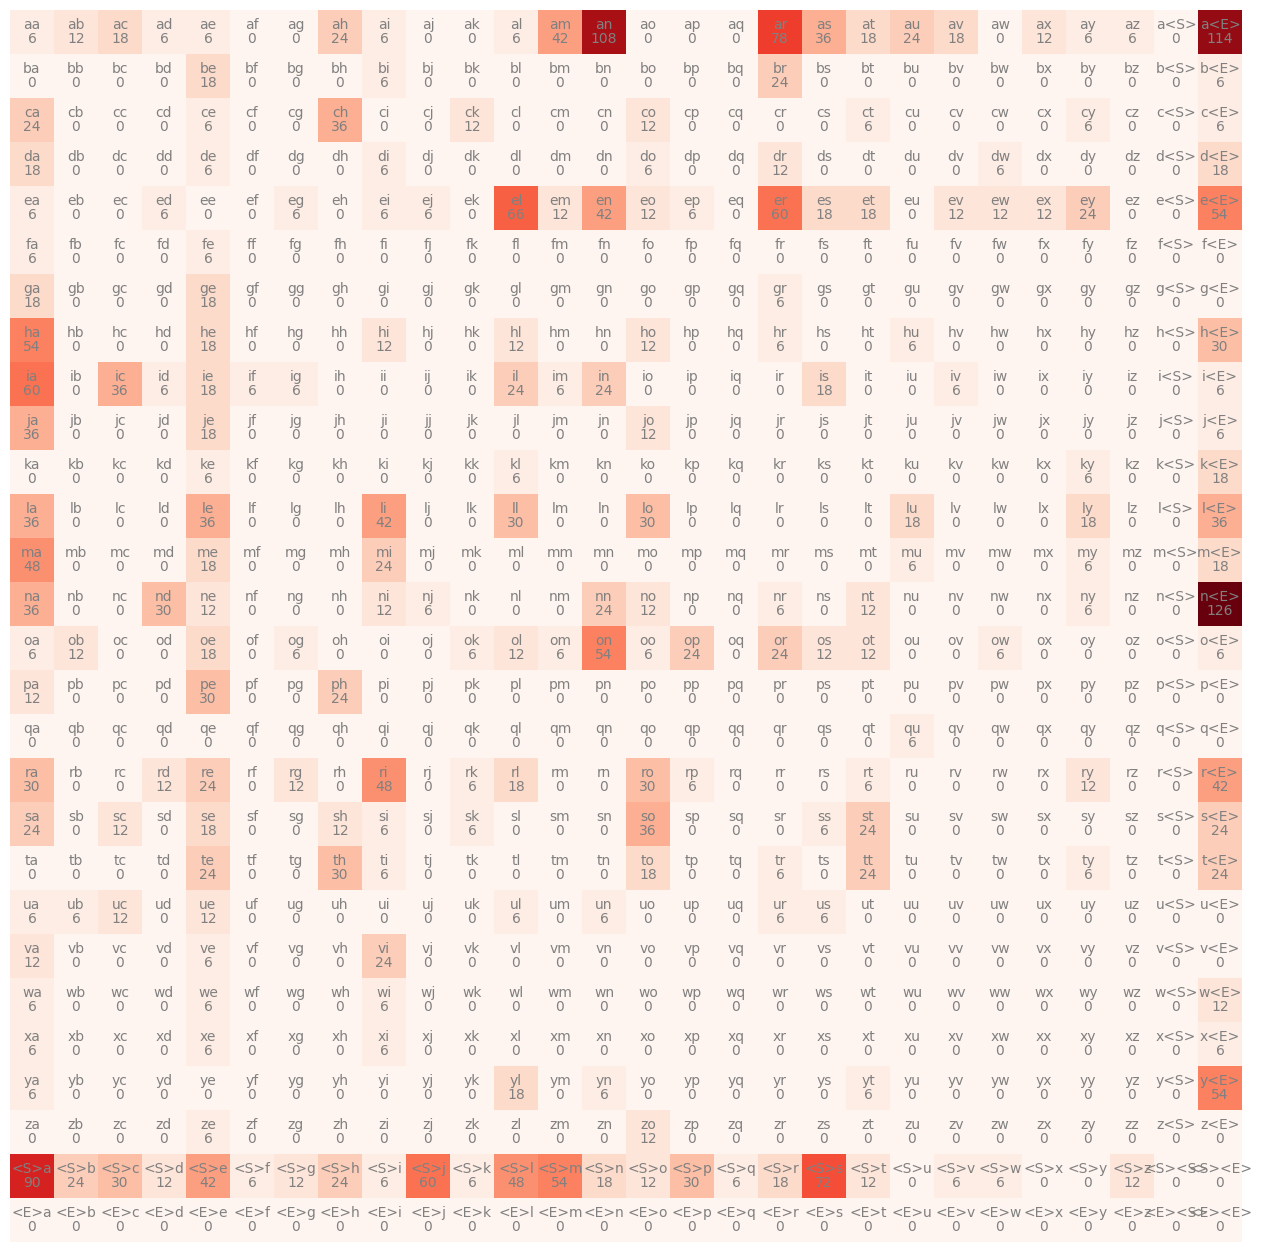

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        style_props = {"ha":"center",  "color":"gray"}
        plt.text(j, i, chstr, **style_props, va="bottom")
        plt.text(j, i, N[i, j].item(), **style_props, va="top")
plt.axis('off')     